In [255]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

<font size = 6>Sampling

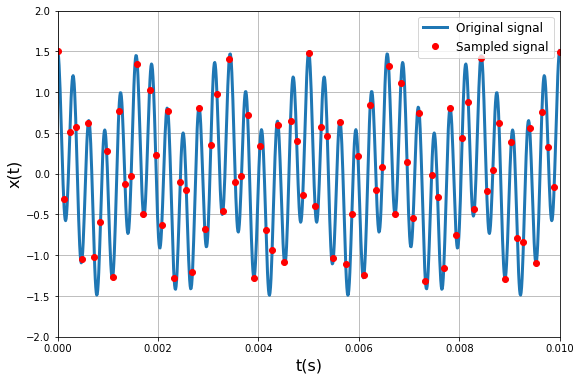

In [256]:
t = np.linspace(0, 1, 100000)   #Time span
xt = np.cos(2*np.pi*3200*t) + 0.5*np.cos(2*np.pi*600*t) + 0.01*np.cos(2*np.pi*300*t)    #Original signal
Fs = 8192   #By Nyquist-Shannon theorem, Fs > 2*3200 = 6400, hence 8192 that is the closest power of 2 greater than 6400
n = np.arange(0, 1, 1/Fs)   #Sampling points
xn = np.cos(2*np.pi*3200*n) + 0.5*np.cos(2*np.pi*600*n) + 0.01*np.cos(2*np.pi*300*n)    #Sampled signal

plt.figure(figsize = (9, 6))
plt.plot(t, xt, linewidth = 3, label = 'Original signal')
plt.plot(n, xn, 'o', color = 'r', label = 'Sampled signal')
plt.xlim(0, 0.01)
plt.ylim(-2, 2)
plt.xlabel('t(s)', fontsize = 16)
plt.ylabel('x(t)', fontsize = 16)
plt.legend(fontsize = 12, loc = 'upper right')
plt.grid(True)

<font size = 6>Original and Sampled frequency spectrums

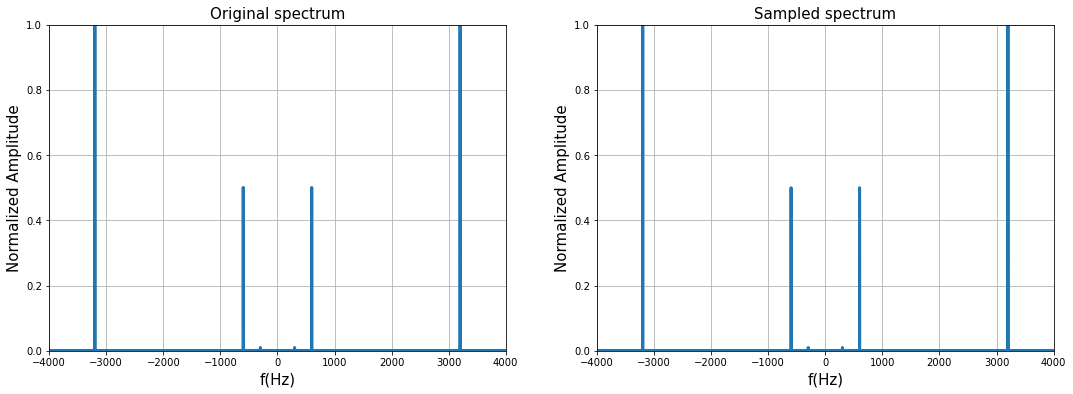

In [257]:
To = t[1] - t[0]    #Original Period
os = abs(fft(xt))   #Original Spectrum
of = fftfreq(len(xt), To)    #Frequency span

Ts = 1/Fs    #Sampled Period
ss = abs(fft(xn))   #Sampled spectrum
sf = fftfreq(len(xn), Ts)   #Frequency span

figure1, ax1 = plt.subplots(1, 2, figsize = (18,6))
ax1[0].plot(of, (os/os.max()), linewidth = 3)  
ax1[0].set_xlim(-4000, 4000)
ax1[0].set_ylim(0, 1)
ax1[0].set_xlabel('f(Hz)', fontsize = 15)
ax1[0].set_ylabel('Normalized Amplitude', fontsize = 15)
ax1[0].set_title('Original spectrum', fontsize = 15)
ax1[0].grid(True)

ax1[1].plot(sf, (ss/ss.max()), linewidth = 3)  
ax1[1].set_xlim(-4000, 4000)
ax1[1].set_ylim(0, 1)
ax1[1].set_xlabel('f(Hz)', fontsize = 15)
ax1[1].set_ylabel('Normalized Amplitude', fontsize = 15)
ax1[1].set_title('Sampled spectrum', fontsize = 15)
ax1[1].grid(True)

<font size = 6>Signal retrieval

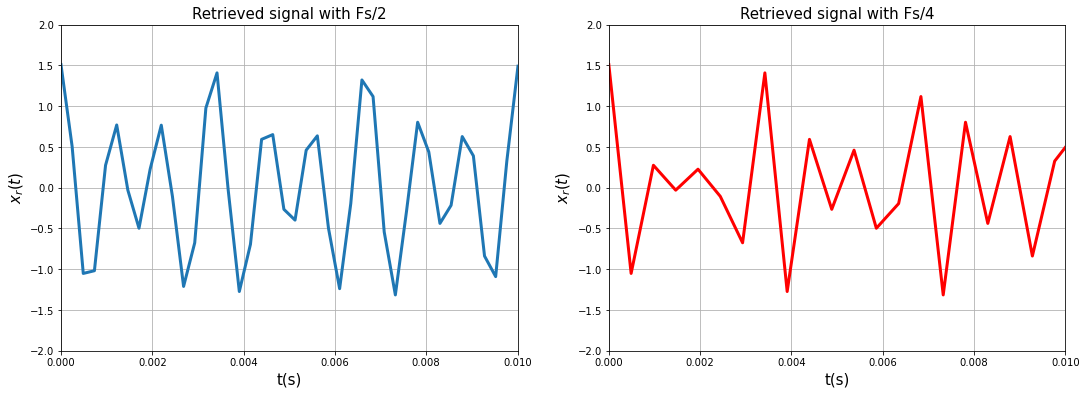

In [260]:
Fs2 = Fs/2  #Half sampling frequency
n2 = np.arange(0, 1, 1/Fs2) #Sampling points for Fs/2
xn2 = np.cos(2*np.pi*3200*n2) + 0.5*np.cos(2*np.pi*600*n2) + 0.01*np.cos(2*np.pi*300*n2)    #Sampled signal for Fs/2
xr2 = np.zeros(len(n2))

for i in range(len(n2)):
    xr2 += xn2[i]*np.sinc((Fs2*n2 - i))

figure2, ax2 = plt.subplots(1, 2, figsize = (18,6))
ax2[0].plot(n2, xr2, linewidth = 3)
ax2[0].set_xlim(0, 0.01)
ax2[0].set_ylim(-2, 2)
ax2[0].set_xlabel('t(s)', fontsize = 15)
ax2[0].set_ylabel('$x_r(t)$', fontsize = 15)
ax2[0].set_title('Retrieved signal with Fs/2', fontsize = 15)
ax2[0].grid(True)

Fs4 = Fs/4  #Quarter sampling frequency
n4 = np.arange(0, 1, 1/Fs4) #Sampling points for Fs/4
xn4 = np.cos(2*np.pi*3200*n4) + 0.5*np.cos(2*np.pi*600*n4) + 0.01*np.cos(2*np.pi*300*n4)    #Sampled signal for Fs/4
xr4 = np.zeros(len(n4))

for i in range(len(n4)):
    xr4 += xn4[i]*np.sinc((Fs4*n4 - i))

ax2[1].plot(n4, xr4, 'r', linewidth = 3)
ax2[1].set_xlim(0, 0.01)
ax2[1].set_ylim(-2, 2)
ax2[1].set_xlabel('t(s)', fontsize = 15)
ax2[1].set_ylabel('$x_r(t)$', fontsize = 15)
ax2[1].set_title('Retrieved signal with Fs/4', fontsize = 15)
ax2[1].grid(True)

<font size = 6>Decimation

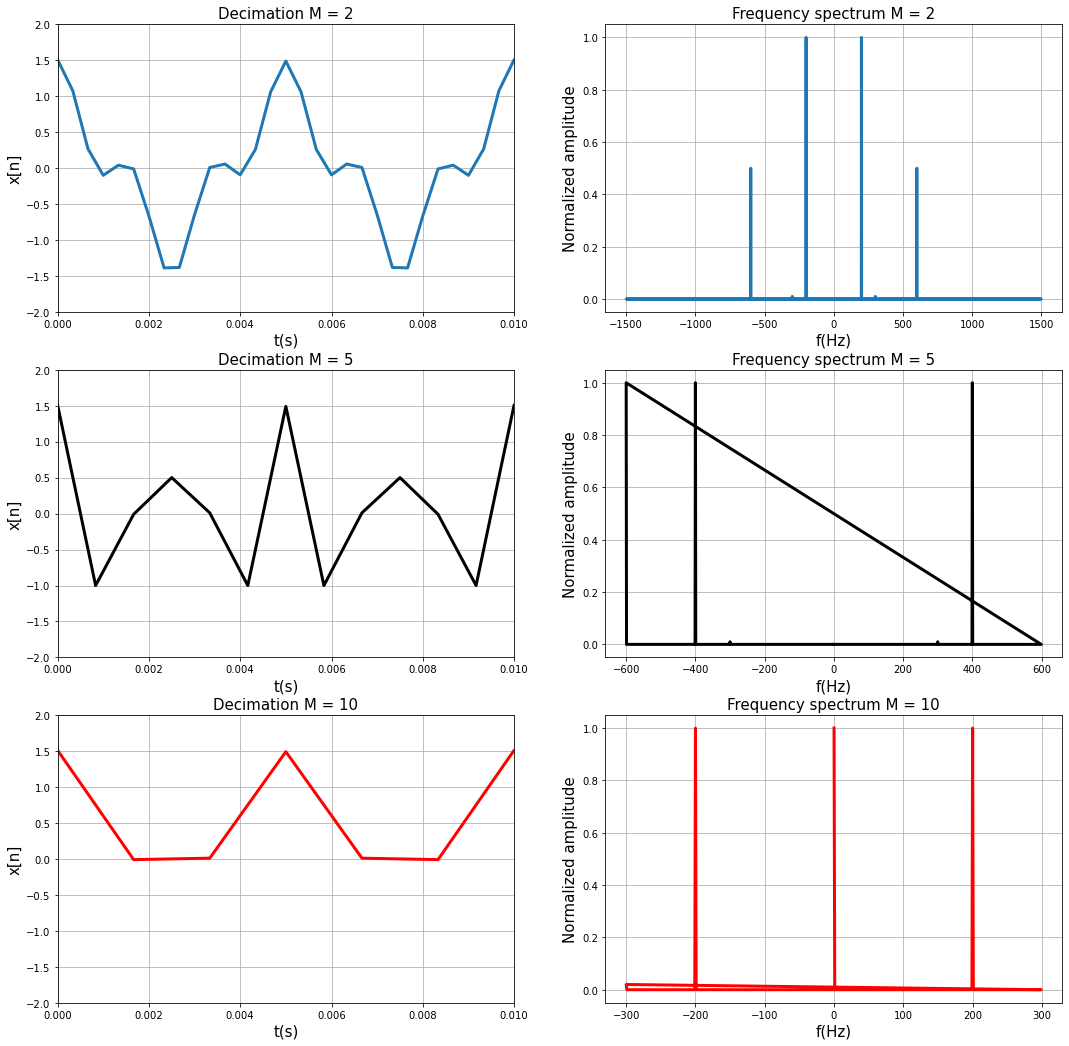

In [181]:
Fsd = 6000  #Sampling frequency por the decimation

nd2 = np.arange(0, 1, 2/Fsd)
xd2 = np.cos(2*np.pi*3200*nd2) + 0.5*np.cos(2*np.pi*600*nd2) + 0.01*np.cos(2*np.pi*300*nd2)
Ts2 = 2/Fsd    #Sampled Period
ssd2 = abs(fft(xd2))   #Sampled spectrum
sfd2 = fftfreq(len(xd2), Ts2)   #Frequency span

nd5 = np.arange(0, 1, 5/Fsd)
xd5 = np.cos(2*np.pi*3200*nd5) + 0.5*np.cos(2*np.pi*600*nd5) + 0.01*np.cos(2*np.pi*300*nd5)
Ts5 = 5/Fsd    #Sampled Period
ssd5 = abs(fft(xd5))   #Sampled spectrum
sfd5 = fftfreq(len(xd5), Ts5)   #Frequency span

nd10 = np.arange(0, 1, 10/Fsd)
xd10 = np.cos(2*np.pi*3200*nd10) + 0.5*np.cos(2*np.pi*600*nd10) + 0.01*np.cos(2*np.pi*300*nd10)
Ts10 = 10/Fsd    #Sampled Period
ssd10 = abs(fft(xd10))   #Sampled spectrum
sfd10 = fftfreq(len(xd10), Ts10)   #Frequency span

figure3, ax3 = plt.subplots(3, 2, figsize = (18,18))

ax3[0][0].plot(nd2, xd2, linewidth = 3)
ax3[0][0].set_xlim(0, 0.01)
ax3[0][0].set_ylim(-2, 2)
ax3[0][0].set_xlabel('t(s)', fontsize = 15)
ax3[0][0].set_ylabel('x[n]', fontsize = 15)
ax3[0][0].set_title('Decimation M = 2', fontsize = 15)
ax3[0][0].grid(True)

ax3[0][1].plot(sfd2, ssd2/ssd2.max(), linewidth = 3)
ax3[0][1].set_xlabel('f(Hz)', fontsize = 15)
ax3[0][1].set_ylabel('Normalized amplitude', fontsize = 15)
ax3[0][1].set_title('Frequency spectrum M = 2', fontsize = 15)
ax3[0][1].grid(True)

ax3[1][0].plot(nd5, xd5, color = 'k', linewidth = 3)
ax3[1][0].set_xlim(0, 0.01)
ax3[1][0].set_ylim(-2, 2)
ax3[1][0].set_xlabel('t(s)', fontsize = 15)
ax3[1][0].set_ylabel('x[n]', fontsize = 15)
ax3[1][0].set_title('Decimation M = 5', fontsize = 15)
ax3[1][0].grid(True)

ax3[1][1].plot(sfd5, ssd5/ssd5.max(), color = 'k', linewidth = 3)
ax3[1][1].set_xlabel('f(Hz)', fontsize = 15)
ax3[1][1].set_ylabel('Normalized amplitude', fontsize = 15)
ax3[1][1].set_title('Frequency spectrum M = 5', fontsize = 15)
ax3[1][1].grid(True)

ax3[2][0].plot(nd10, xd10, color = 'r', linewidth = 3)
ax3[2][0].set_xlim(0, 0.01)
ax3[2][0].set_ylim(-2, 2)
ax3[2][0].set_xlabel('t(s)', fontsize = 15)
ax3[2][0].set_ylabel('x[n]', fontsize = 15)
ax3[2][0].set_title('Decimation M = 10', fontsize = 15)
ax3[2][0].grid(True)

ax3[2][1].plot(sfd10, ssd10/ssd10.max(), color = 'r', linewidth = 3)
ax3[2][1].set_xlabel('f(Hz)', fontsize = 15)
ax3[2][1].set_ylabel('Normalized amplitude', fontsize = 15)
ax3[2][1].set_title('Frequency spectrum M = 10', fontsize = 15)
ax3[2][1].grid(True)

<font size = 6>Interpolation

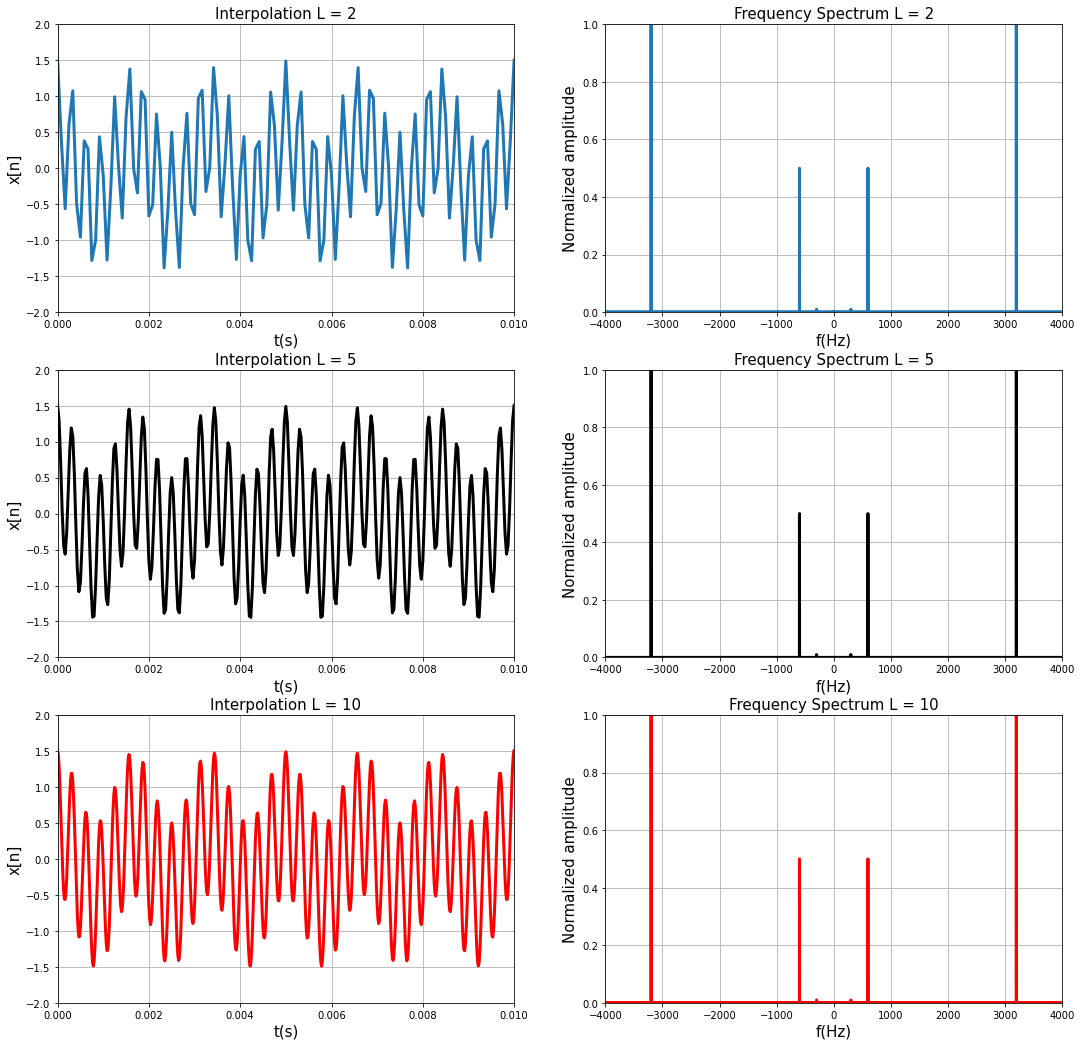

In [268]:
Fsi = 6000

Tsi2 = 1/(2*Fsi)    #Interpolation period
ni2 = np.arange(0, 1, Tsi2)    #Sampled points
xi2 = np.cos(2*np.pi*3200*ni2) + 0.5*np.cos(2*np.pi*600*ni2) + 0.01*np.cos(2*np.pi*300*ni2) #Interpolated signal
ssi2 = abs(fft(xi2))   #Sampled spectrum
sfi2 = fftfreq(len(xi2), Tsi2)   #Frequency span

Tsi5 = 1/(5*Fsi)    #Interpolation period
ni5 = np.arange(0, 1, Tsi5)    #Sampled points
xi5 = np.cos(2*np.pi*3200*ni5) + 0.5*np.cos(2*np.pi*600*ni5) + 0.01*np.cos(2*np.pi*300*ni5) #Interpolated signal
ssi5 = abs(fft(xi5))   #Sampled spectrum
sfi5 = fftfreq(len(xi5), Tsi5)   #Frequency span

Tsi10 = 1/(10*Fsi)    #Interpolation period
ni10 = np.arange(0, 1, Tsi10)    #Sampled points
xi10 = np.cos(2*np.pi*3200*ni10) + 0.5*np.cos(2*np.pi*600*ni10) + 0.01*np.cos(2*np.pi*300*ni10) #Interpolated signal
ssi10 = abs(fft(xi10))   #Sampled spectrum
sfi10 = fftfreq(len(xi10), Tsi10)   #Frequency span

figure4, ax4 = plt.subplots(3, 2, figsize = (18,18))
ax4[0][0].plot(ni2, xi2, linewidth = 3)
ax4[0][0].set_xlim(0, 0.01)
ax4[0][0].set_ylim(-2, 2)
ax4[0][0].set_xlabel('t(s)', fontsize = 15)
ax4[0][0].set_ylabel('x[n]', fontsize = 15)
ax4[0][0].set_title('Interpolation L = 2', fontsize = 15)
ax4[0][0].grid(True)

ax4[0][1].plot(sfi2, ssi2/ssi2.max(), linewidth = 3)
ax4[0][1].set_xlim(-4000, 4000)
ax4[0][1].set_ylim(0, 1)
ax4[0][1].set_xlabel('f(Hz)', fontsize = 15)
ax4[0][1].set_ylabel('Normalized amplitude', fontsize = 15)
ax4[0][1].set_title('Frequency Spectrum L = 2', fontsize = 15)
ax4[0][1].grid(True)

ax4[1][0].plot(ni5, xi5, color = 'k', linewidth = 3)
ax4[1][0].set_xlim(0, 0.01)
ax4[1][0].set_ylim(-2, 2)
ax4[1][0].set_xlabel('t(s)', fontsize = 15)
ax4[1][0].set_ylabel('x[n]', fontsize = 15)
ax4[1][0].set_title('Interpolation L = 5', fontsize = 15)
ax4[1][0].grid(True)

ax4[1][1].plot(sfi5, ssi5/ssi5.max(), color = 'k', linewidth = 3)
ax4[1][1].set_xlim(-4000, 4000)
ax4[1][1].set_ylim(0, 1)
ax4[1][1].set_xlabel('f(Hz)', fontsize = 15)
ax4[1][1].set_ylabel('Normalized amplitude', fontsize = 15)
ax4[1][1].set_title('Frequency Spectrum L = 5', fontsize = 15)
ax4[1][1].grid(True)

ax4[2][0].plot(ni10, xi10, color = 'r', linewidth = 3)
ax4[2][0].set_xlim(0, 0.01)
ax4[2][0].set_ylim(-2, 2)
ax4[2][0].set_xlabel('t(s)', fontsize = 15)
ax4[2][0].set_ylabel('x[n]', fontsize = 15)
ax4[2][0].set_title('Interpolation L = 10', fontsize = 15)
ax4[2][0].grid(True)

ax4[2][1].plot(sfi10, ssi10/ssi10.max(), color = 'r', linewidth = 3)
ax4[2][1].set_xlim(-4000, 4000)
ax4[2][1].set_ylim(0, 1)
ax4[2][1].set_xlabel('f(Hz)', fontsize = 15)
ax4[2][1].set_ylabel('Normalized amplitude', fontsize = 15)
ax4[2][1].set_title('Frequency Spectrum L = 10', fontsize = 15)
ax4[2][1].grid(True)

inter de vdd

(0.0, 0.01)

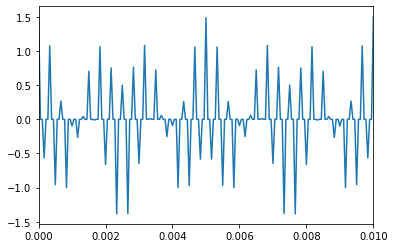

In [281]:
fsi = 6000
L = 2
n2 = np.arange(0, 1, 1/fsi)
ni2 = np.arange(0, 1, 1/((L+1)*fsi))
x2 = np.cos(2*np.pi*3200*n2) + 0.5*np.cos(2*np.pi*600*n2) + 0.01*np.cos(2*np.pi*300*n2)
xi2 = np.zeros((L+1)*len(n2))

for i in range(len(ni2)):
    if(i % (L+1) == 0):
        xi2[i] = x2[int(i/(L+1))]
    else:
        xi2[i] = 0

for k in range(len(ni2)):
    xi2 += xi2[i]*np.sinc(ni2/L - k)

plt.plot(ni2, xi2)
plt.xlim(0, 0.01)